In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

# Create an SQLite connection and export DataFrame to the database:

# Create a connection to the SQLite database
conn = sqlite3.connect('netflix_project.db')

# Export the DataFrame to a table in the SQLite database
df.to_sql('netflix', conn, if_exists='replace', index=False)

8807

In [3]:
# Step 2: Function to run SQL query and return DataFrame

def run_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    
    # Extract column names
    columns = [col[0] for col in cursor.description]
    
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=columns)
    cursor.close()

    return df


##  🎬 Count of Movies vs TV Shows

In [4]:
print("🎥 Let's compare how many Movies and TV Shows are in the Netflix dataset. Are we binge-watching more movies or shows? Let's find out!")

query = """
SELECT type, COUNT(*) AS count
FROM netflix
GROUP BY type
"""

df = run_query(query)

🎥 Let's compare how many Movies and TV Shows are in the Netflix dataset. Are we binge-watching more movies or shows? Let's find out!


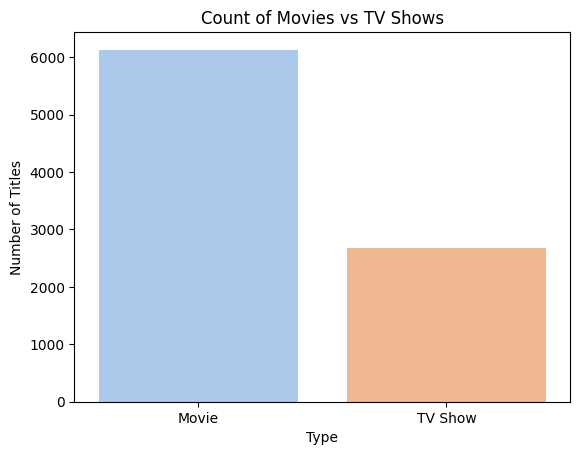

In [5]:
# Plot 

sns.barplot(data=df, x='type', y='count', palette='pastel')
plt.title('Count of Movies vs TV Shows')
plt.ylabel('Number of Titles')
plt.xlabel('Type')
plt.show()

## 📺 Distribution of Ratings

In [6]:
print("🔢 What kinds of ratings does Netflix content have? From TV-MA to PG, let's see how content is distributed across age categories.")

query = """
SELECT rating, COUNT(*) AS count
FROM netflix
GROUP BY rating
ORDER BY count DESC
"""

df = run_query(query)

🔢 What kinds of ratings does Netflix content have? From TV-MA to PG, let's see how content is distributed across age categories.


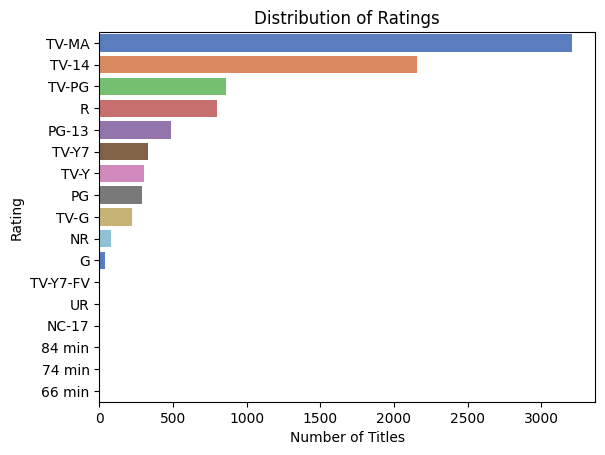

In [7]:
# Plot

sns.barplot(data=df, x='count', y='rating', palette='muted')
plt.title('Distribution of Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()


In [8]:
print("🧠 Which shows or movies have the longest descriptions? Let's find out which titles Netflix tried hardest to explain!")

query = """
SELECT title, LENGTH(description) AS desc_length
FROM netflix
ORDER BY desc_length DESC
LIMIT 5
"""

df = run_query(query)

🧠 Which shows or movies have the longest descriptions? Let's find out which titles Netflix tried hardest to explain!


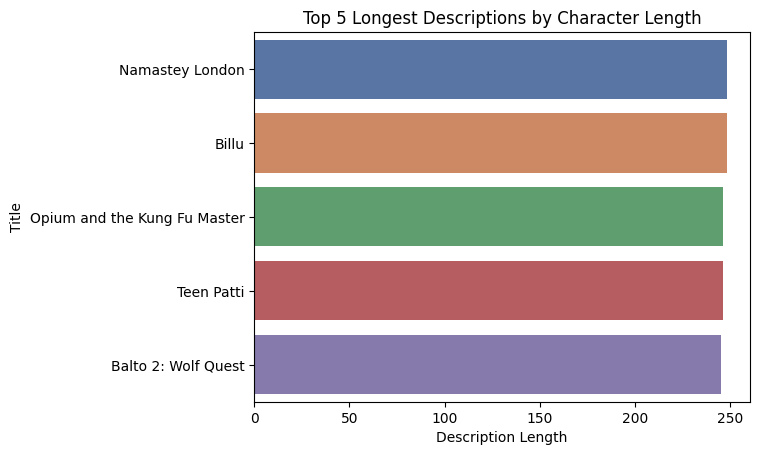

In [9]:
# Plot 
sns.barplot(data=df, x='desc_length', y='title', palette='deep')
plt.title('Top 5 Longest Descriptions by Character Length')
plt.xlabel('Description Length')
plt.ylabel('Title')
plt.show()


## 🥧 Top 5 Countries by Content — Pie Chart

In [10]:
query = """
SELECT country, COUNT(*) AS count FROM netflix
WHERE country IS NOT NULL
GROUP BY country ORDER BY count DESC LIMIT 5;
"""
df = run_query(query)


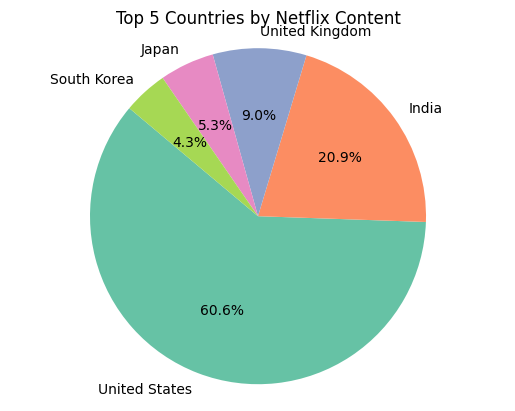

In [11]:
# Plot

plt.pie(data=df, x= 'count', labels= 'country', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Top 5 Countries by Netflix Content")
plt.axis('equal')
plt.show()

## 📈 Number of Releases Per Year — Line Plot

In [12]:
query = "SELECT release_year, COUNT(*) AS count FROM netflix WHERE release_year IS NOT NULL GROUP BY release_year;"
df = run_query(query)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


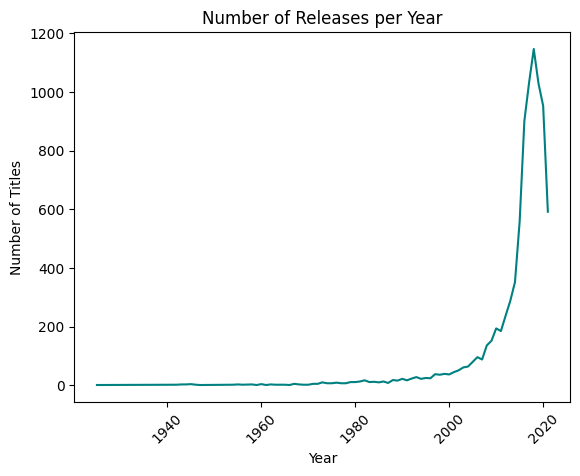

In [13]:
# Plot

sns.lineplot(data=df, x='release_year', y= 'count', markers='o', color = 'teal')
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

## 📊 Count by Rating — Bar Chart (Horizontal)

In [14]:
query = "SELECT rating, COUNT(*) AS count FROM netflix GROUP BY rating;"
df = run_query(query).sort_values(by='count', ascending=False)

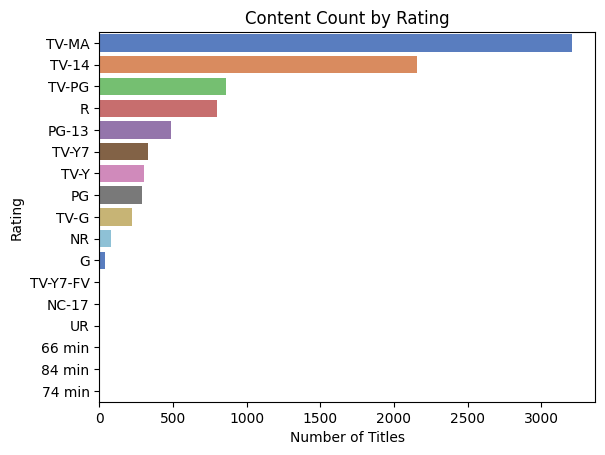

In [15]:
# Plot 

sns.barplot(data=df, x= 'count', y='rating', palette='muted')
plt.title("Content Count by Rating")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()

## 📅 Year When Titles Were Added — Bar Plot

In [16]:
query = """
SELECT date_added
FROM netflix
WHERE date_added IS NOT NULL;
"""
df = run_query(query)

# Convert textual dates to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Group by year
yearly = df.dropna(subset=['year_added']).groupby('year_added').size().reset_index(name='count')

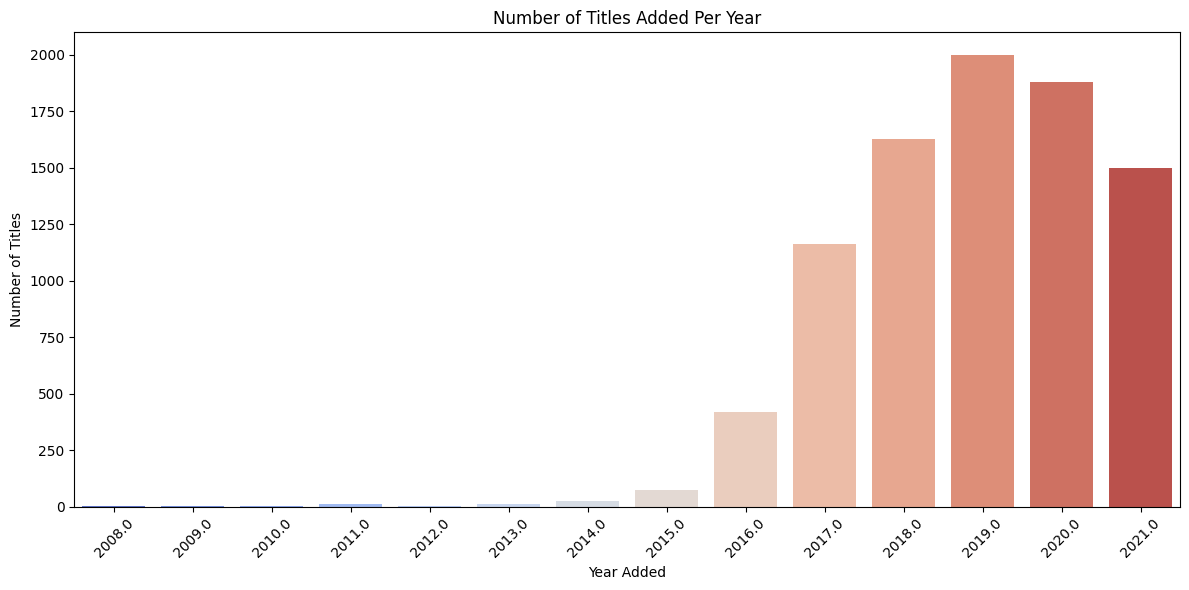

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly, x='year_added', y='count', palette='coolwarm')
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🗓️ Titles Added Between 2019–2021 — Line Plot or Bar Plot

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


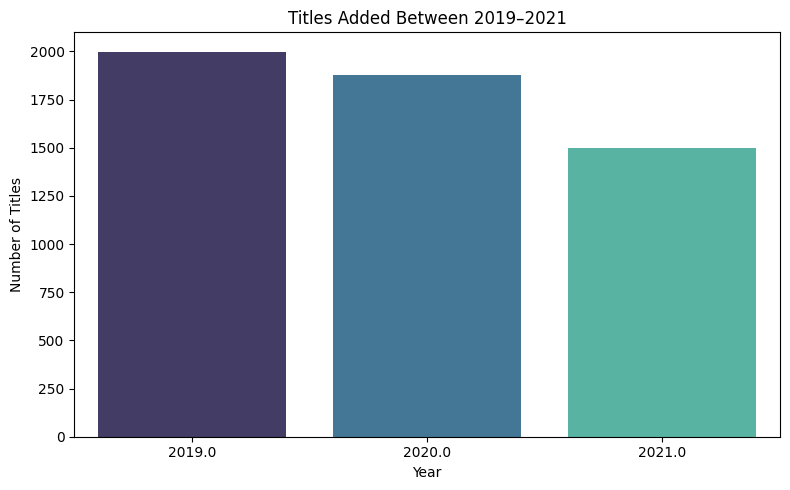

In [18]:
# Step 1: Raw query to get date_added column
query = """
SELECT date_added
FROM netflix
WHERE date_added IS NOT NULL;
"""
df = run_query(query)

# Step 2: Convert date_added to datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Step 3: Filter years between 2019 and 2021
df_filtered = df[df['year_added'].between(2019, 2021)]

# Step 4: Group and count
yearly = df_filtered.groupby('year_added').size().reset_index(name='count')

# Step 5: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=yearly, x='year_added', y='count', palette='mako')
plt.title("Titles Added Between 2019–2021")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


## 🎭 Top 5 Genres (listed_in) — Horizontal Bar Plot

In [19]:
query = """
SELECT listed_in, COUNT(*) AS count 
FROM netflix
GROUP BY listed_in 
ORDER BY count DESC LIMIT 5;
"""
df = run_query(query)

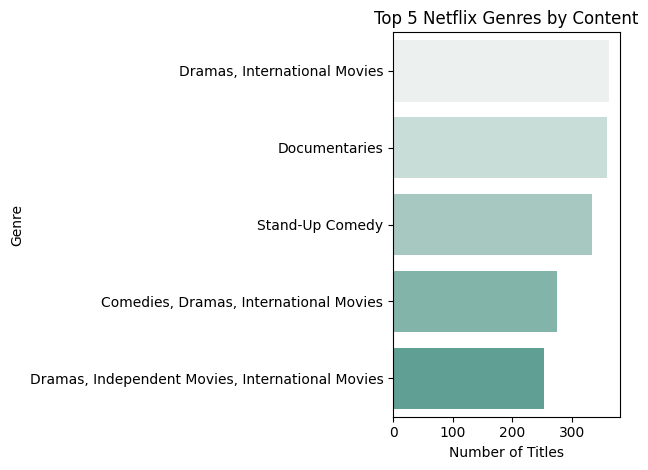

In [20]:
# Plot

sns.barplot(data=df, y='listed_in', x='count', palette='light:#5A9')
plt.title("Top 5 Netflix Genres by Content")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


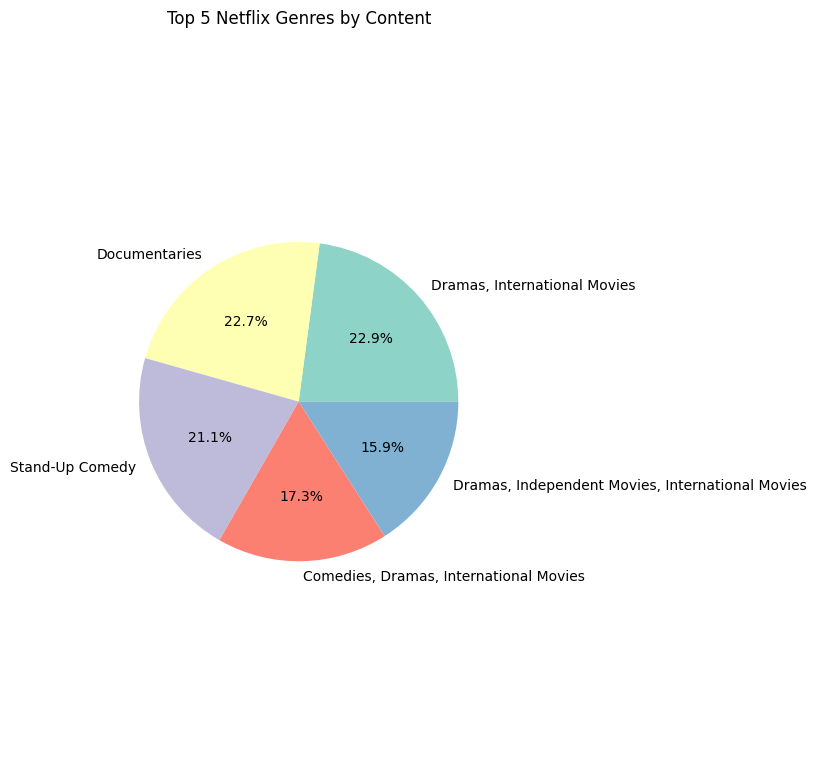

In [21]:
# Plot

plt.figure(figsize=(8, 8))
plt.pie(data=df, x='count', labels='listed_in', autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title("Top 5 Netflix Genres by Content")
plt.axis('equal')  # Keeps pie chart circular
plt.tight_layout()
plt.show()

## 🎬 Top 5 Longest Movies by Duration — Bar Plot

In [22]:
query = """
SELECT 
    title, 
    CAST(substr(duration, 1, instr(duration, ' ') - 1) AS INTEGER) AS minutes
FROM 
    netflix
WHERE 
    type = 'Movie' AND duration LIKE '%min%'
ORDER BY 
    minutes DESC
LIMIT 5;
"""

df = run_query(query)
print(df)


                         title  minutes
0   Black Mirror: Bandersnatch      312
1  Headspace: Unwind Your Mind      273
2       The School of Mischief      253
3               No Longer kids      237
4           Lock Your Girls In      233


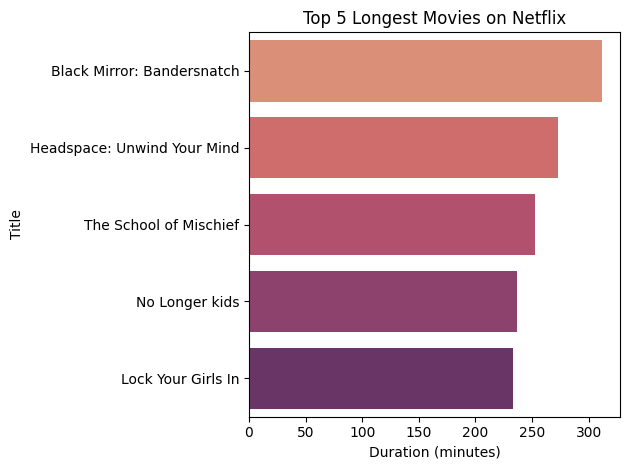

In [23]:
# Plot

sns.barplot(data=df, x= 'minutes', y= 'title',  palette='flare')
plt.title("Top 5 Longest Movies on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Title")
plt.tight_layout()
plt.show()

## 🎥 Top 10 Directors by Number of Contents — Pie Chart

In [24]:
query = """
SELECT director, COUNT(*) AS count 
FROM netflix 
WHERE director IS NOT NULL 
GROUP BY director 
ORDER BY count DESC 
LIMIT 10;
"""
df = run_query(query)

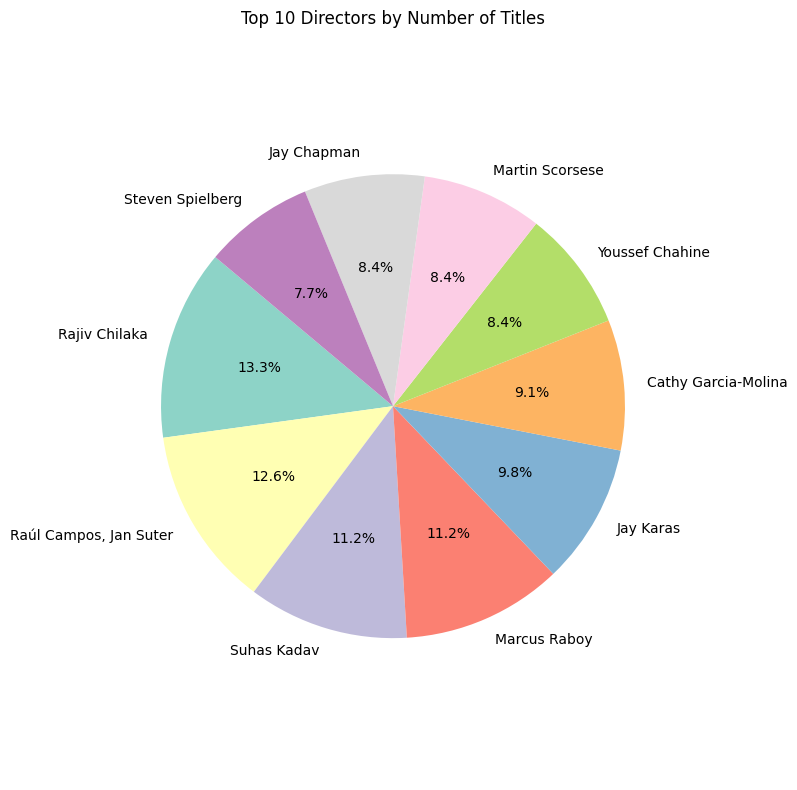

In [25]:
# Plot 

plt.figure(figsize=(8,8))
plt.pie(data=df, x='count', labels= 'director', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Top 10 Directors by Number of Titles")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

## 📊 Monthly Content Additions — Line Plot

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


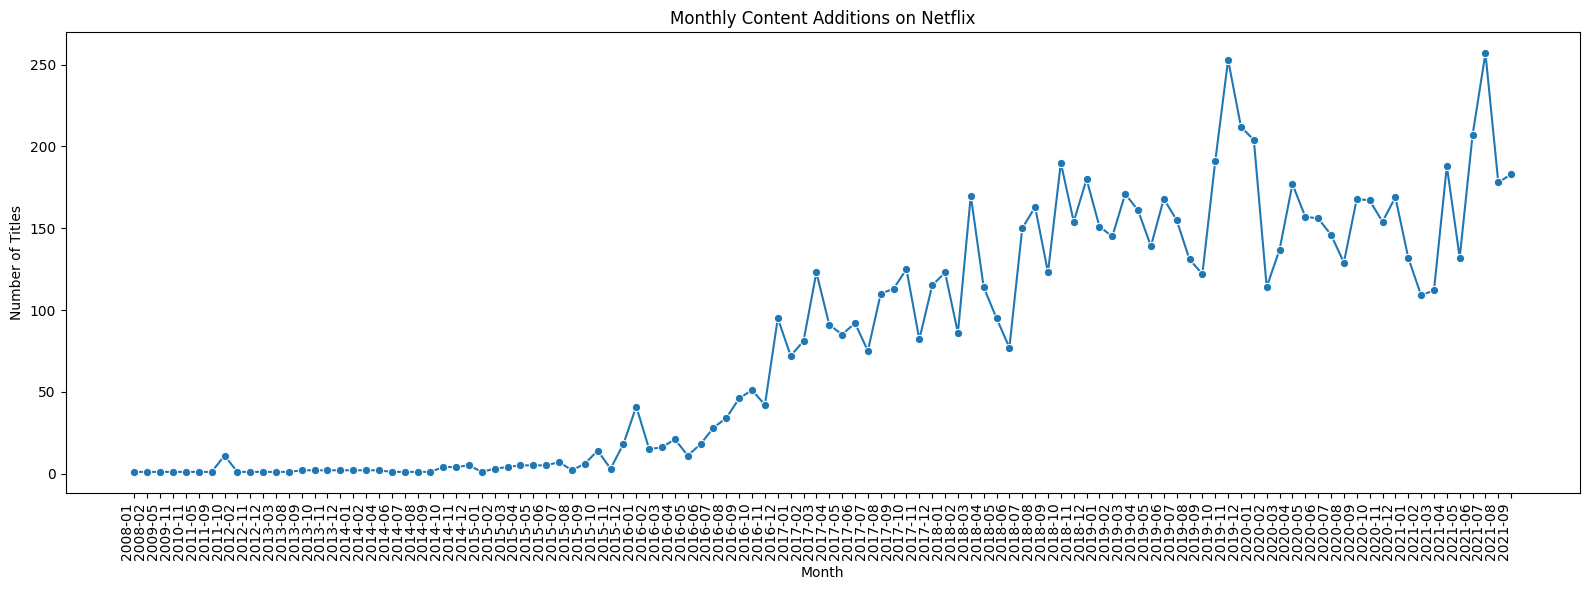

In [26]:
# Step 1: Pull raw date_added data
query = """
SELECT date_added
FROM netflix
WHERE date_added IS NOT NULL;
"""
df = run_query(query)

# Step 2: Convert date_added to datetime and format as YYYY-MM
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df = df.dropna(subset=['date_added'])  # drop rows where parsing failed
df['month_added'] = df['date_added'].dt.to_period('M').astype(str)

# Step 3: Group by month
monthly = df.groupby('month_added').size().reset_index(name='total')

# Step 4: Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly, x='month_added', y='total', marker='o')
plt.xticks(rotation=90, ha='right')
plt.title("Monthly Content Additions on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


## Categorize Content by Rating Level (Pie Chart)

In [27]:
query = """
SELECT 
  CASE
    WHEN rating IN ('G', 'PG', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV') THEN 'Family'
    WHEN rating IN ('PG-13', 'TV-14', 'TV-PG') THEN 'Teen'
    WHEN rating IN ('R', 'TV-MA', 'NC-17') THEN 'Adult'
    ELSE 'Other'
  END AS category,
  COUNT(*) AS count
FROM netflix
WHERE rating NOT LIKE '%min%' AND rating IS NOT NULL
GROUP BY category;
"""
df = run_query(query)



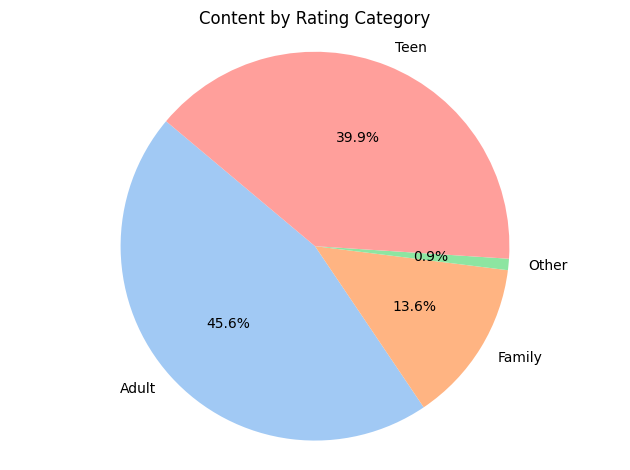

In [28]:
# Plot

plt.pie(data=df, x= 'count', labels= 'category', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Content by Rating Category")
plt.axis('equal')
plt.tight_layout()
plt.show()

## ✅ Top 5 Directors (Bar Plot)

In [29]:
query = """
SELECT director, COUNT(*) AS total FROM netflix 
WHERE director IS NOT NULL 
GROUP BY director 
ORDER BY total DESC LIMIT 5;
"""
df = run_query(query)

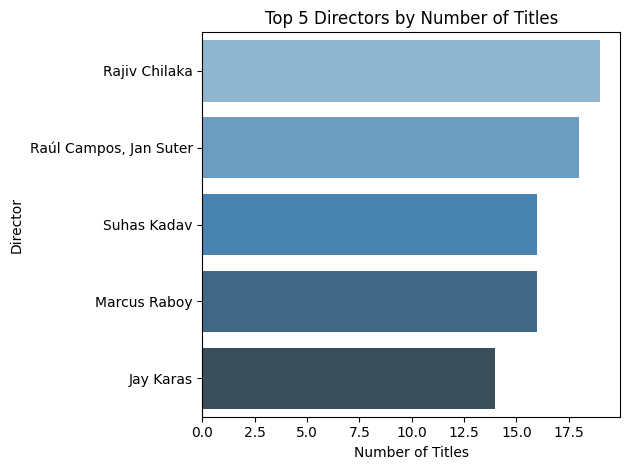

In [30]:
# Plot

sns.barplot(data=df, x= 'total', y= 'director', palette='Blues_d')
plt.title("Top 5 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

## ✅ Countries with > 100 Titles (Bar Plot)

In [31]:
query = """
SELECT country, COUNT(*) AS count 
FROM netflix 
WHERE country IS NOT NULL 
GROUP BY country 
HAVING COUNT(*) > 100 
ORDER BY count DESC;
"""
df = run_query(query)


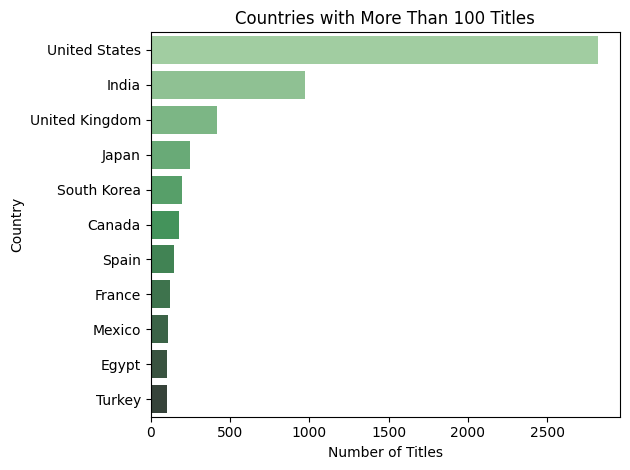

In [32]:
# Plot

sns.barplot(data=df,x= 'count', y= 'country', palette='Greens_d')
plt.title("Countries with More Than 100 Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## 🎨 Top 3 Recent Titles by Type

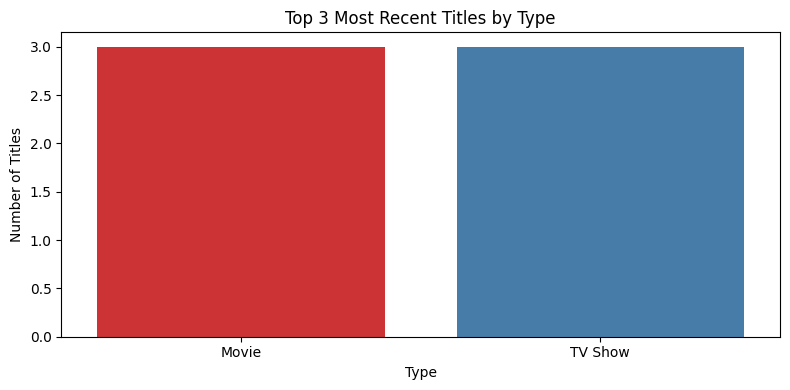

In [33]:
# Step 1: Raw query
query = """
SELECT title, type, date_added
FROM netflix
WHERE date_added IS NOT NULL;
"""
df = run_query(query)

# Step 2: Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df = df.dropna(subset=['date_added'])  # drop rows where conversion failed

# Step 3: Rank within each type
df['rnk'] = df.groupby('type')['date_added'].rank(method='first', ascending=False)

# Step 4: Filter top 3 recent per type
top3_df = df[df['rnk'] <= 3]

# Step 5: Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=top3_df, x='type', palette='Set1')
plt.title('Top 3 Most Recent Titles by Type')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


## 🎨 Count of Single-Genre Titles by Genre

In [34]:
query = """
SELECT * 
FROM netflix 
WHERE listed_in NOT LIKE '%,%';
"""
df = run_query(query)


In [35]:
# Count single genres
genre_counts = df['listed_in'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

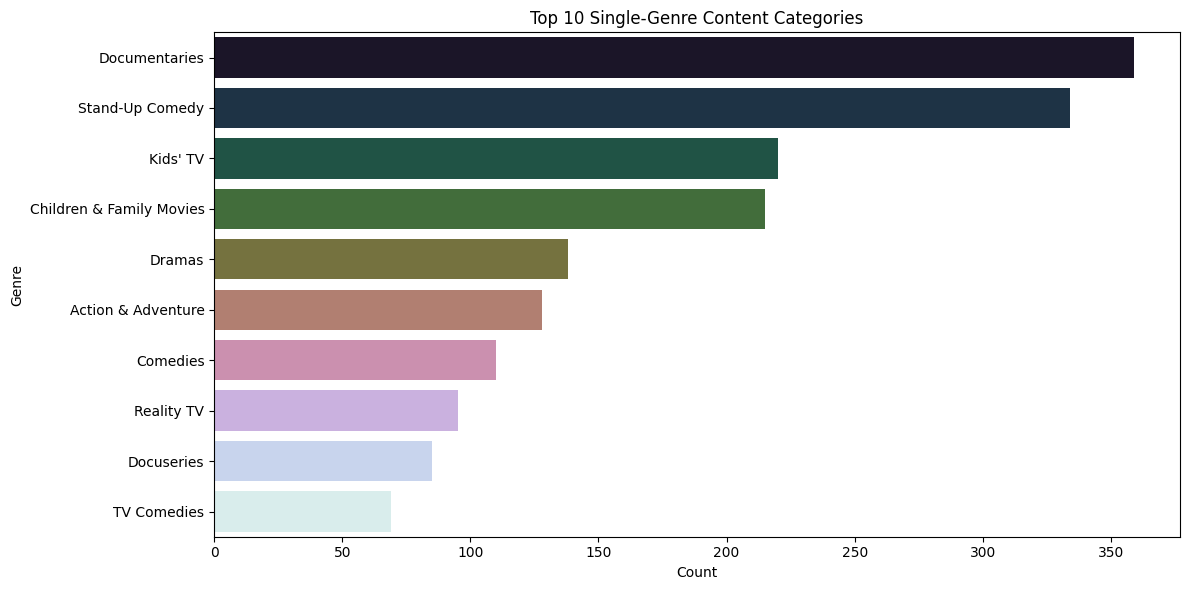

In [36]:
# Plot top 10 single genres

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts.head(10), x='count', y='genre', palette='cubehelix')
plt.title('Top 10 Single-Genre Content Categories')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## 🎨 First Release Year by Type

In [37]:
query = """
SELECT 
    type, 
    title, 
    release_year 
FROM (
    SELECT *, 
           RANK() OVER(PARTITION BY type ORDER BY release_year ASC) AS rnk 
    FROM netflix
    WHERE release_year IS NOT NULL
) AS ranked 
WHERE rnk = 1;
"""
df = run_query(query)


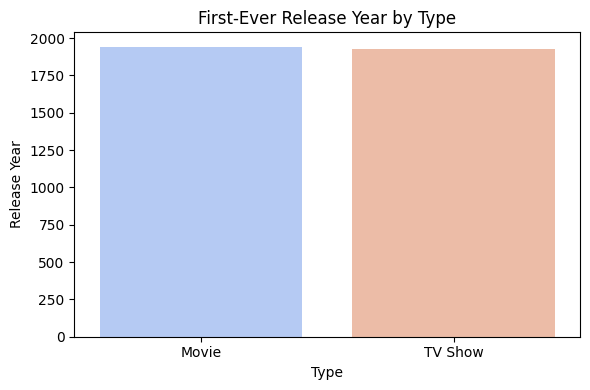

In [38]:
# Plot

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='type', y='release_year', palette='coolwarm')
plt.title('First-Ever Release Year by Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.tight_layout()
plt.show()

## 🎨 Drama Titles Count by Type

In [39]:
query = """
WITH drama_titles AS (
    SELECT * 
    FROM netflix 
    WHERE listed_in LIKE '%Drama%'
)
SELECT * 
FROM drama_titles;
"""
df = run_query(query)


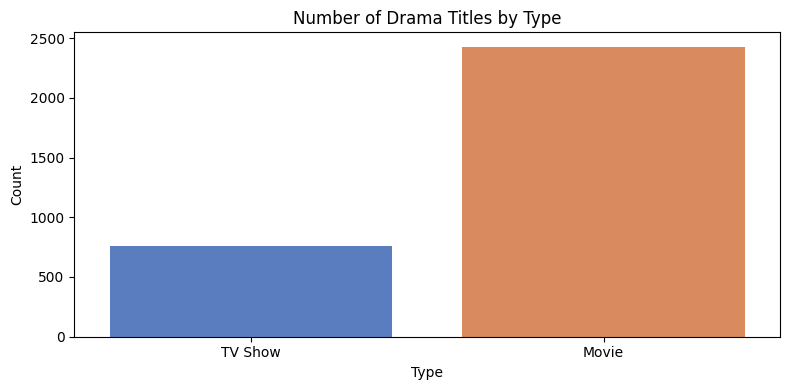

In [40]:
# Plot

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x= 'type', palette='muted')
plt.title('Number of Drama Titles by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 🎨 Top Countries by Frequency in Top 3 Recent Titles

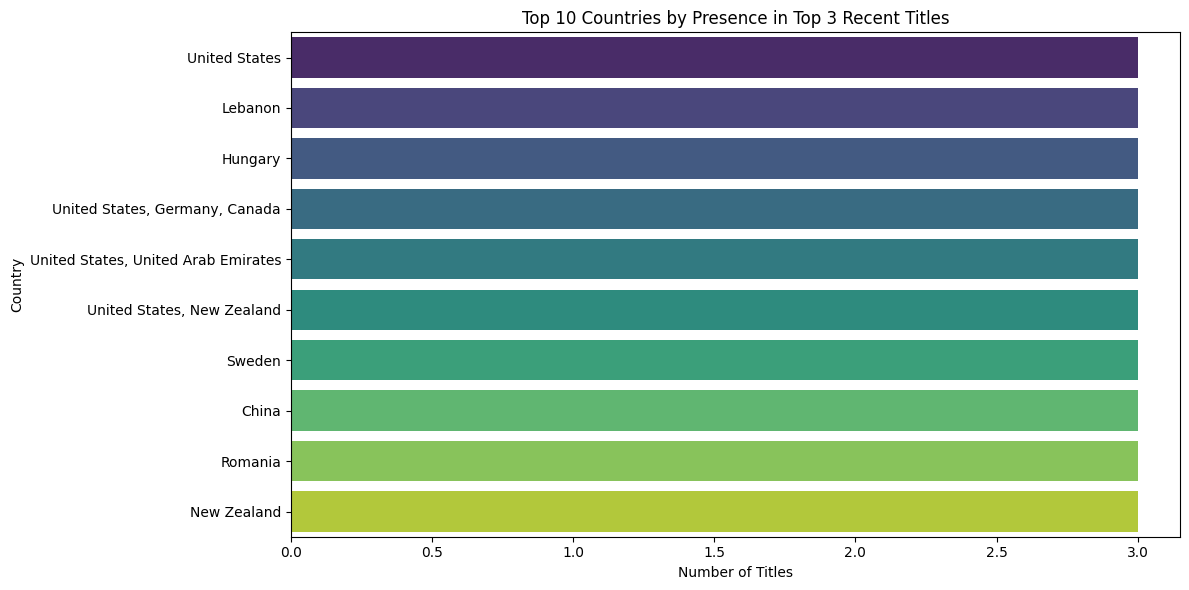

In [41]:
# Step 1: Get relevant fields from SQLite (no ROW_NUMBER or STR_TO_DATE)
query = """
SELECT title, country, date_added
FROM netflix
WHERE country IS NOT NULL AND date_added IS NOT NULL;
"""
df = run_query(query)

# Step 2: Clean 'country' field (remove extra commas/spaces)
df['country'] = df['country'].str.strip().str.strip(',')

# Step 3: Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df = df.dropna(subset=['date_added'])

# Step 4: Get row number (rank) per country by recent date
df['rnk'] = df.groupby('country')['date_added'].rank(method='first', ascending=False)

# Step 5: Filter top 3 recent titles per country
top3_df = df[df['rnk'] <= 3]

# Step 6: Count titles per country
country_counts = top3_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Step 7: Filter top 10 countries
top_countries = country_counts.head(10)

# Step 8: Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='count', y='country', palette='viridis')
plt.title('Top 10 Countries by Presence in Top 3 Recent Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## ✅ Directors with more than 5 titles

In [42]:
query = """
SELECT 
    director, COUNT(*) AS total_count
FROM
    netflix
WHERE
    director IS NOT NULL
GROUP BY 
    director
HAVING 
    COUNT(*) > 5
ORDER BY 
    total_count DESC;
"""
df = run_query(query)

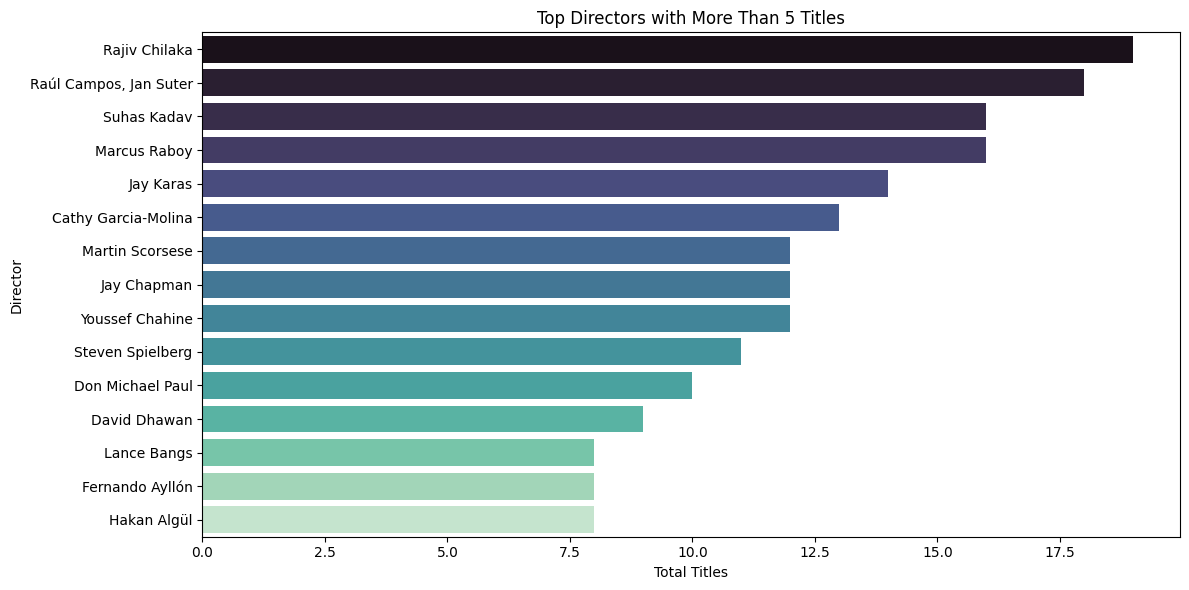

In [43]:
top_directors = df.sort_values('total_count', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='total_count', y='director', palette='mako')
plt.title('Top Directors with More Than 5 Titles')
plt.xlabel('Total Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

## ✅ Number of releases by type per year

In [44]:
query = """
SELECT 
    release_year, type, COUNT(*) AS count 
FROM 
    netflix 
GROUP BY 
    type, release_year 
ORDER BY 
    release_year;
"""
df = run_query(query)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

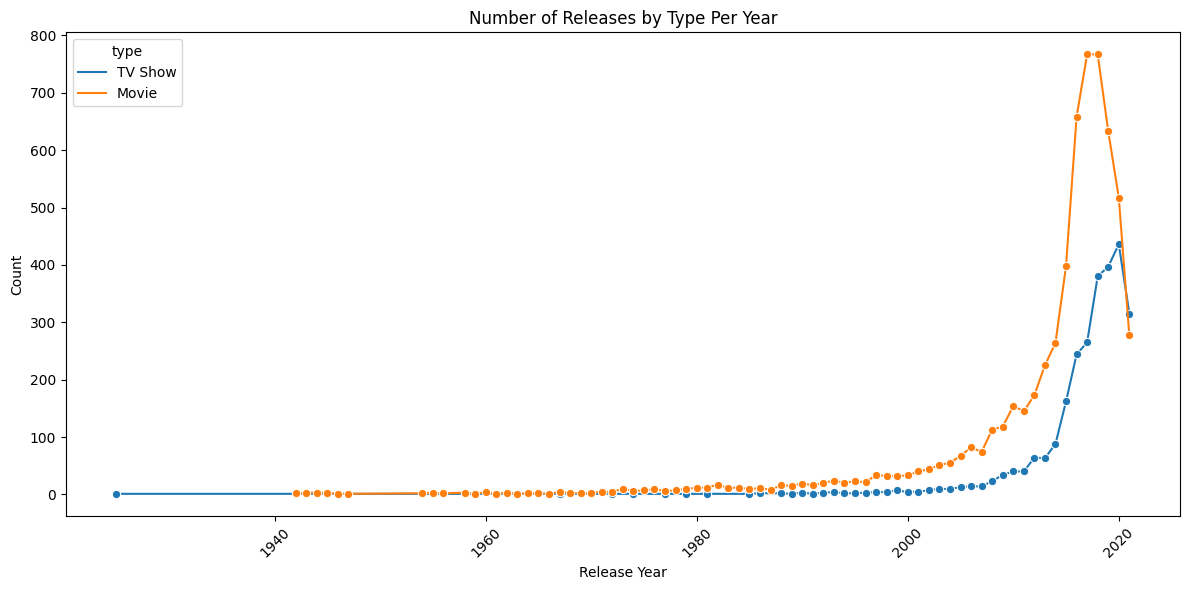

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_year', y='count', hue='type', marker='o', palette='tab10')
plt.title('Number of Releases by Type Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ✅ Movies longer than 2 hours

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


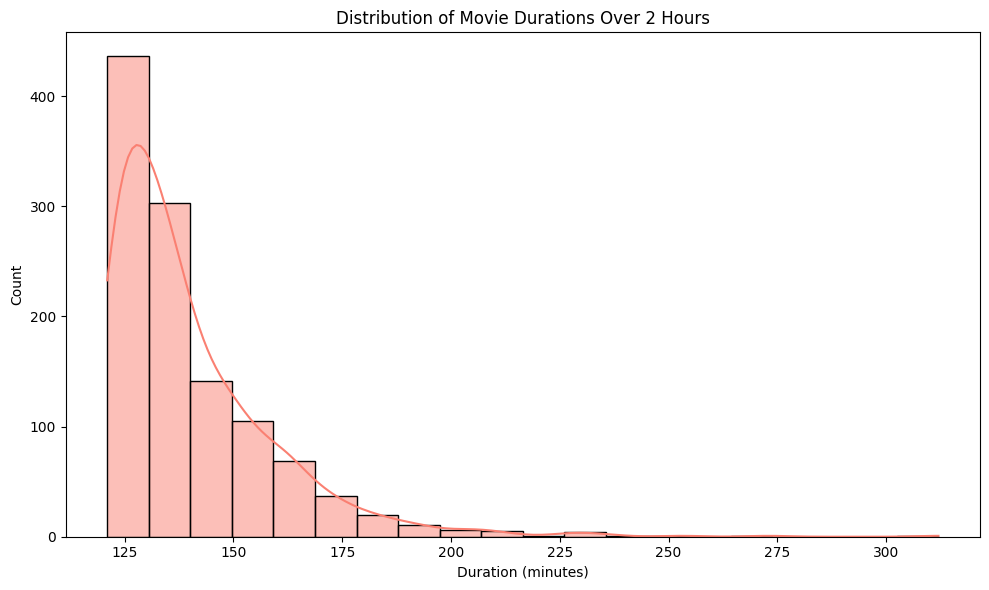

In [46]:
# SQLite-compatible query (remove unsupported SUBSTRING_INDEX)
query = """
SELECT 
    title, duration
FROM
    netflix
WHERE
    type = 'Movie' AND duration LIKE '%min%';
"""
df = run_query(query)

# Split to extract duration in minutes and convert to integer
df['duration_min'] = df['duration'].str.split(' ').str[0].astype(int)

# Filter movies longer than 120 minutes
df = df[df['duration_min'] > 120]

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['duration_min'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Movie Durations Over 2 Hours')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## ✅ Content additions per year grouped by type

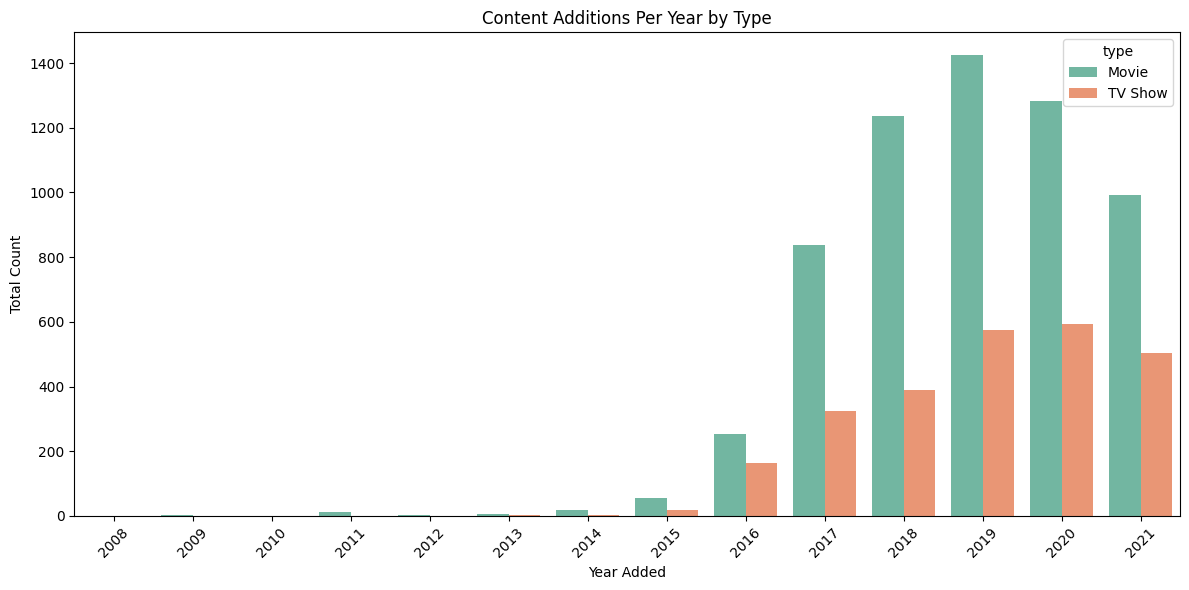

In [47]:
# Step 1: Fetch raw data
query = """
SELECT 
    type,
    date_added
FROM
    netflix
WHERE
    date_added IS NOT NULL;
"""
df = run_query(query)

# Step 2: Convert to datetime & extract year
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df = df.dropna(subset=['date_added'])  # drop rows where date conversion failed
df['year_added'] = df['date_added'].dt.year

# Step 3: Group by year and type
df_grouped = df.groupby(['year_added', 'type']).size().reset_index(name='total_count')

# Step 4: Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='year_added', y='total_count', hue='type', palette='Set2')
plt.title('Content Additions Per Year by Type')
plt.xlabel('Year Added')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
